In [1]:
import pandas as pd
import seaborn as sns
from scipy.cluster import hierarchy
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
# Name of the CSV file
file = Path('Resources/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [3]:
# The correct encoding must be used to read the CSV in pandas
df = pd.read_csv(file, encoding="ISO-8859-1")

In [4]:
df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
5,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
6,0.0,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,5.0,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,6.0,0.0,1.0,6.0,4.0,4.0


In [5]:
# Select dependent variable (y) and independent variables (X)
y = df['Diabetes_binary']
X = df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
        'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
        'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
        'Education', 'Income']]

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the logistic regression model with increased max_iter
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5156 1934]
 [1622 5427]]
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7090
         1.0       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



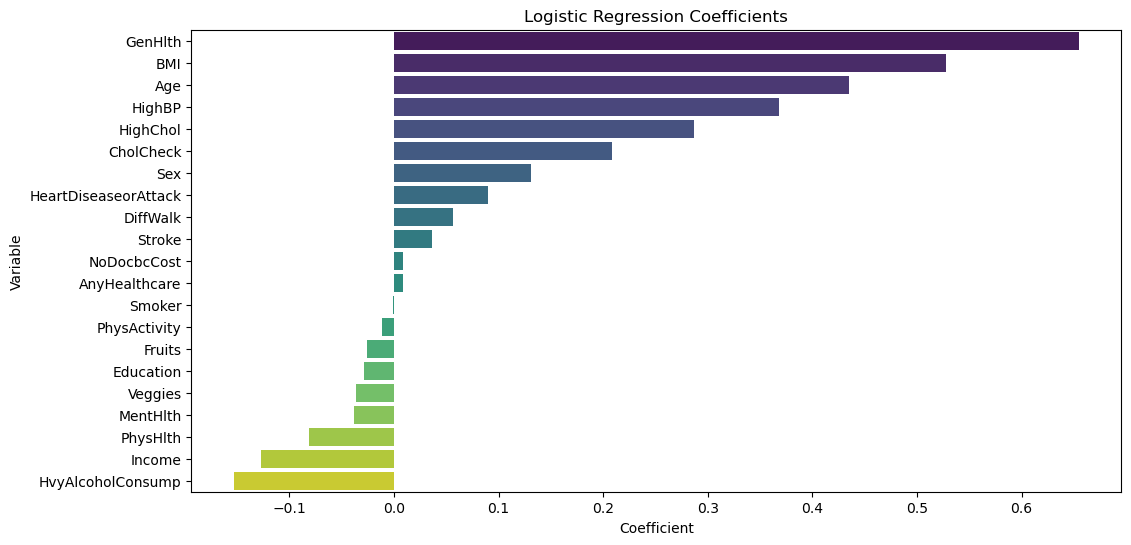

In [7]:
# Visualize coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Variable', data=coefficients, palette='viridis')
plt.title('Logistic Regression Coefficients')
plt.show()

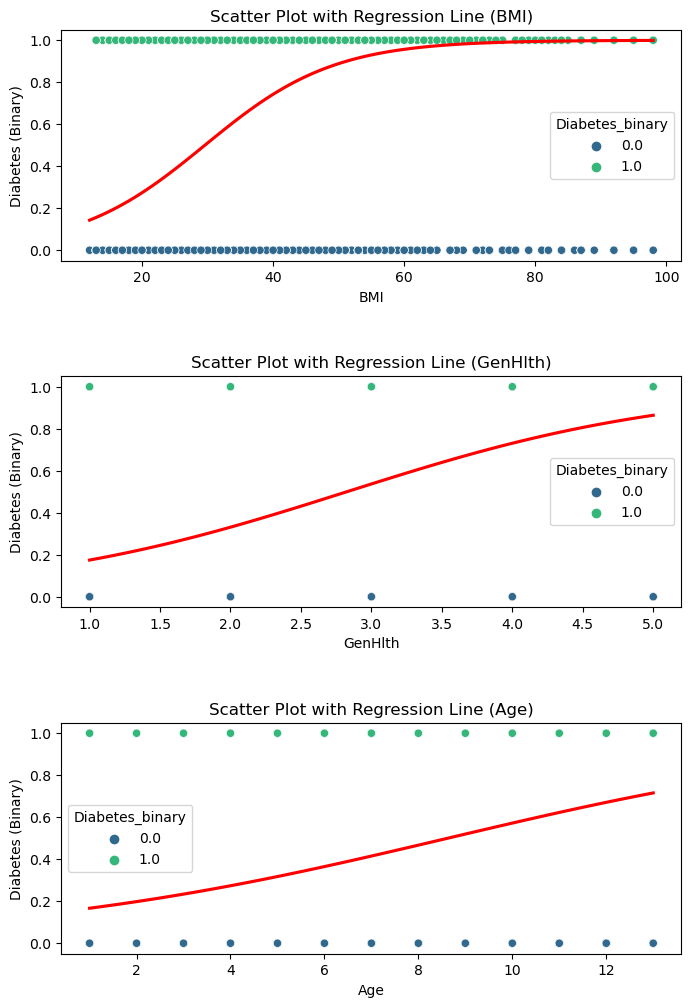

In [8]:
# Select variables for scatter plots
scatter_variables = ['BMI', 'GenHlth', 'Age']

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=len(scatter_variables), ncols=1, figsize=(8, 4 * len(scatter_variables)))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical space between subplots

# Create scatter plots with regression lines
for i, variable in enumerate(scatter_variables):
    ax = axes[i]
    
    # Scatter plot
    sns.scatterplot(x=variable, y='Diabetes_binary', data=df, hue='Diabetes_binary', marker='o', palette='viridis', ax=ax)
    
    # Regression line
    sns.regplot(x=variable, y='Diabetes_binary', data=df, logistic=True, scatter=False, color='red', ax=ax)
    
    # Set labels and title for each subplot
    ax.set_xlabel(variable)
    ax.set_ylabel('Diabetes (Binary)')
    ax.set_title(f'Scatter Plot with Regression Line ({variable})')

# Show the plots
plt.show()